Gradient Descent is an optimisation algorithm which helps you find the optimal weights for your model. It does it by trying various weights and finding the weights which fit the models best i.e. minimises the cost function. Cost function can be defined as the difference between the actual output and the predicted output. Hence, the smaller the cost function is, the closer the predicted output from your model is to the actual output. Predicted value can be mathematically defined as: <br>𝑦=𝛽+θnXn, where x is the parameters(can go from 1 to n), 𝛽 is the bias and θ is the weight.There can be different cost functions for different applications like binary cross entropy, categorical cross entropy, sparse categorical cross entropy. <br>While on the other hand, the learning rate of the gradient descent is represented as α. Learning rate is the size of step taken by each gradient. While a large learning rate can give us poorly optimised values for 𝛽 and θ, the learning rate can also be too small which takes a substantial increment in number of iterations required to get the the convergence point(the optimal value point for 𝛽 and θ). This algorithm, gives us the value of α, 𝛽 and θ as output.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv(r"Dataset/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [89]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [90]:
X = df[['TV','radio','newspaper']]
Y = df['sales']

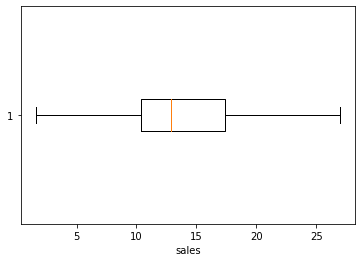

In [91]:
plt.boxplot(df['sales'],vert=False)
plt.xlabel("sales")
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y=np.array((Y-Y.mean())/Y.std())

#### Once we have a normalised dataset, we can start defining our algorithm. To implement a gradient descent algorithm we need to follow 4 steps:

1)Randomly initialize the bias and the weight theta<br>
2)Calculate predicted value of y that is Y given the bias and the weight<br>
3)Calculate the cost function from predicted and actual values of Y<br>
4)Calculate gradient and the weights<br>

To start, we will take a random value for bias and weights, which might be actually close to the optimal bias and weights or can be far off.

In [93]:
import random
def initialize(dim):
    b = random.random()
    theta = np.random.rand(dim)
    return b,theta
b,theta = initialize(3)
print("Bias:",b, ", Weights:",theta)

Bias: 0.5233521406638798 , Weights: [0.12849723 0.91731037 0.5487798 ]


In [94]:
def predict_Y(b,theta,X):
    return b+np.dot(X,theta)
Y_hat = predict_Y(b,theta,X)
Y_hat[:10]

array([ 2.52458556,  1.73021475,  2.70938115,  2.35314446,  0.50540951,
        3.02643712,  0.80146543, -0.22267522, -1.74184623, -0.91371198])

In [95]:
# Defining our cost function
import math
def get_cost(Y,Y_hat):
#     Y_resd = Y - Y_hat
#     return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y_resd)
    return np.sum((Y-Y_hat)**2) / len(Y)

get_cost(Y,Y_hat)

1.3004768558615933

We have used Mean squared error as our cost function. Y_resd is the error between Y and Y_hat. using np.dot(Y_resd.T,Y_resd) we square all the error terms in Y_resd and then by np.sum we add all the squared errors. Then finally we divide this sum of squared errors by the number of terms which yields the mean squared error. Or we can simply use np.sum((Y-Y_hat)**2) / len(Y)

To get the updated bias and weights we use the gradient descent formula of: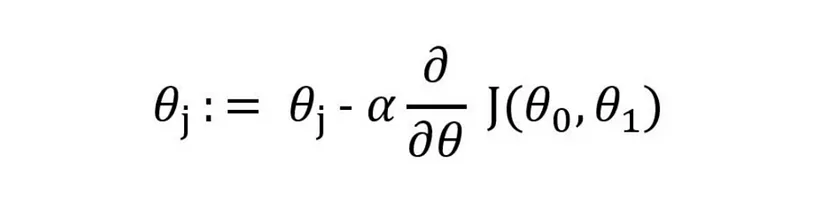The parameters passed to the function are

x,y : the input and output variable<br>
y_hat: predicted value with current bias and weights<br>
b_0,theta_0: current bias and weights<br>
Learning rate: learning rate to adjust the update step<br>

My cost function:

gradient with respect to weight:  
gradient with respect to bias: 


In [96]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db = (np.sum(y_hat - y)*2)/len(y)
    dw = (np.dot(y_hat-y,x)*2)/len(y)
    b_1 = b_0 - learning_rate*db
    theta_1 = theta_o - learning_rate*dw
    return b_1, theta_1

In [97]:
print("After initialization -Bias: ",b,"theta: ",theta)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
Y_hat = predict_Y(b,theta,X)
get_cost(Y,Y_hat)

After initialization -Bias:  0.5233521406638798 theta:  [0.12849723 0.91731037 0.5487798 ]
After first update -Bias:  0.5128850978506022 theta:  [0.13990534 0.90643241 0.53571672]


1.2482078679851123

As we can see, the cost function reduced with the new bias and weights. As we have created all the required fucnctions we can create a main function of gradient descent which runs for a particular number of iterations and finds up optimal bias and weights.

In [98]:
def run_gradient_descent(X,Y,alpha, num_iterations):
    b,theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns = ['iteration','cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b,theta,X)
        this_cost = get_cost(Y,Y_hat)
        prev_b = b
        prev_theta = theta
        b,theta = update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx] = [iter_num,this_cost]
            result_idx = result_idx + 1
        iter_num +=1
    print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta

In [99]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.6482725908649482 [0.31807821 0.54535866 0.59497881]


If we print the cost function for each iteration we can see the decrease in the cost function. We can also plot the cost function to iterations to see the result.

In [100]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,2.245906
1,10.0,2.158325
2,20.0,2.074443
3,30.0,1.994099
4,40.0,1.917140
5,50.0,1.843417
6,60.0,1.772792
7,70.0,1.705129
8,80.0,1.640300
9,90.0,1.578183


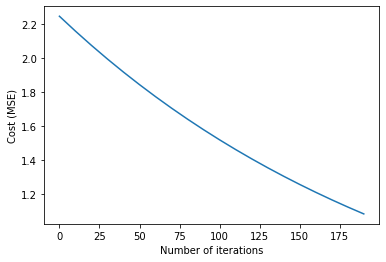

In [104]:
plt.plot(gd_iterations_df["iteration"],gd_iterations_df["cost"])
plt.xlabel("Number of iterations")
plt.ylabel("Cost (MSE)")
plt.show()

As we can see the cost function decreases with increase in iterations, but we still have not reached convergence. Now, let’s try with α=0.01 for 2000 iterations and compare it with α=0.001 and find which learning rate is better for this dataset.

Final Estimate of b and theta :  -3.2476425083259593e-17 [ 0.75118089  0.53513867 -0.00431985]
Final Estimate of b and theta :  0.0031300033574872756 [0.74882595 0.53313203 0.00148572]


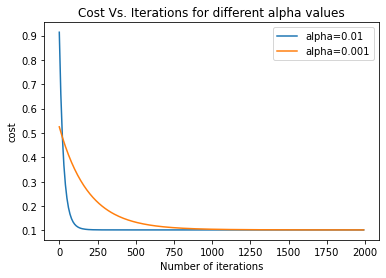

In [105]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1["iteration"],alpha_df_1["cost"],label="alpha=0.01")
plt.plot(alpha_df_2["iteration"],alpha_df_2["cost"],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')
plt.show()

As one can see, 0.01 is the more optimal learning rate as it converges much quicker than 0.001. 0.01 converges around the 100 mark, while 0.001 takes 1000 iterations to reach convergence.